Peak Current: 0.000675 at time 3.68
Lowest Current: -2.311e-06 at time 245.2

High Periods (above average of 0.00):
           time   current
0        0.0128  0.000675
1        0.0192  0.000675
2        0.0256  0.000675
3        0.0320  0.000675
4        0.0384  0.000675
...         ...       ...
37494  240.0000  0.000675
37495  240.0000  0.000675
37496  240.0000  0.000675
37497  240.0000  0.000675
37498  240.0000  0.000675

[37499 rows x 2 columns]

Low Periods (below average of 0.00):
        time   current
37499  240.0 -0.000002
37500  240.0 -0.000002
37501  240.0 -0.000002
37502  240.0 -0.000002
37503  240.0 -0.000002
...      ...       ...
42961  275.0 -0.000002
42962  275.0 -0.000002
42963  275.0 -0.000002
42964  275.0 -0.000002
42965  275.0 -0.000002

[5467 rows x 2 columns]

Periods where current is greater than 0:
           time   current
0        0.0128  0.000675
1        0.0192  0.000675
2        0.0256  0.000675
3        0.0320  0.000675
4        0.0384  0.000675
...      

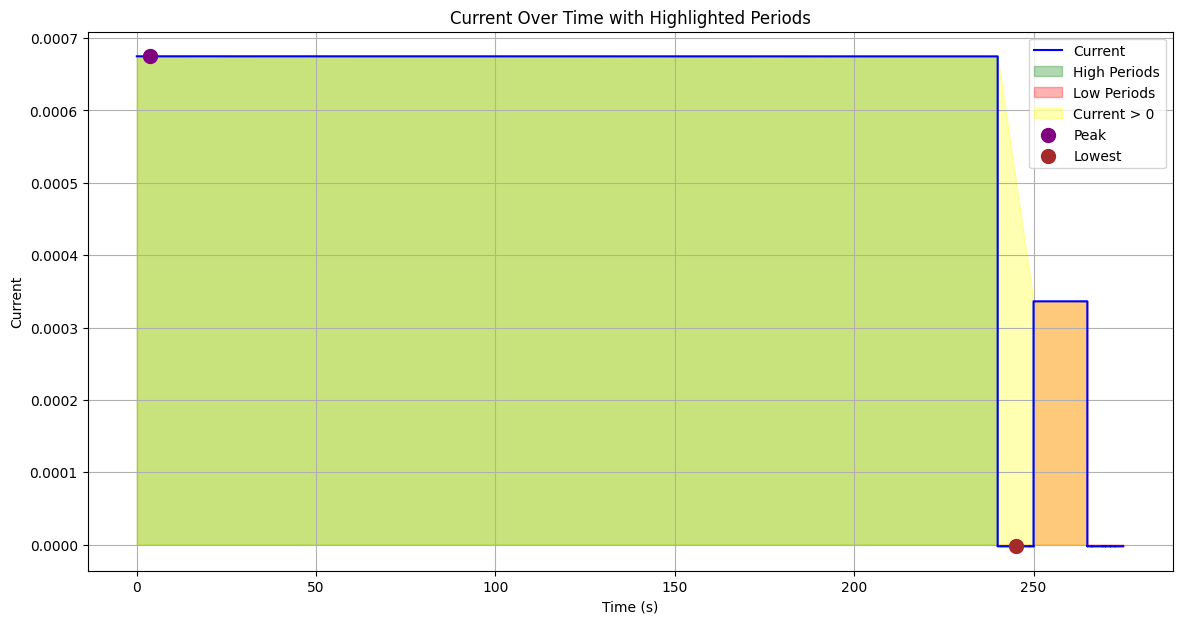


Durations of periods where current > 0:
       start_time  end_time  duration
group                                
0          0.0128     240.0  239.9872
1        250.0000     265.0   15.0000


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('multi_potential step para_test 1.csv', skiprows=24)
data.columns = ['time', 'current']

# Convert to numeric, with error handling
data['time'] = pd.to_numeric(data['time'], errors='coerce')
data['current'] = pd.to_numeric(data['current'], errors='coerce')

# Find peak values
peak_values = data.loc[data['current'].idxmax()]
print(f"Peak Current: {peak_values['current']} at time {peak_values['time']}")

# Lowest value
lowest_value = data.loc[data['current'].idxmin()]
print(f"Lowest Current: {lowest_value['current']} at time {lowest_value['time']}")

# High periods (assuming "high" means above average; adjust threshold as needed)
average_current = data['current'].mean()
high_periods = data[data['current'] > average_current]

# Low periods
low_periods = data[data['current'] < average_current]

print(f"\nHigh Periods (above average of {average_current:.2f}):")
print(high_periods)
print(f"\nLow Periods (below average of {average_current:.2f}):")
print(low_periods)

# Periods where current > 0
positive_current_periods = data[data['current'] > 0]

print(f"\nPeriods where current is greater than 0:")
print(positive_current_periods)

# Visualizing these periods
plt.figure(figsize=(14, 7))
plt.plot(data['time'], data['current'], label='Current', color='blue')

# Highlight high periods
plt.fill_between(high_periods['time'], high_periods['current'], alpha=0.3, color='green', label='High Periods')

# Highlight low periods
plt.fill_between(low_periods['time'], low_periods['current'], alpha=0.3, color='red', label='Low Periods')

# Highlight periods > 0
plt.fill_between(positive_current_periods['time'], positive_current_periods['current'], 
                 where=(positive_current_periods['current'] > 0), 
                 interpolate=True, alpha=0.3, color='yellow', label='Current > 0')

# Mark peak and lowest values
plt.scatter(peak_values['time'], peak_values['current'], color='purple', s=100, zorder=5, label='Peak')
plt.scatter(lowest_value['time'], lowest_value['current'], color='brown', s=100, zorder=5, label='Lowest')

plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.title('Current Over Time with Highlighted Periods')
plt.legend()
plt.grid(True)
plt.show()

# Periods where current > 0, with modifications to avoid SettingWithCopyWarning
positive_current_periods = data[data['current'] > 0].copy()  # Explicitly create a copy

# Calculate differences and group
positive_current_periods.loc[:, 'diff'] = positive_current_periods['time'].diff()
positive_current_periods.loc[:, 'group'] = (positive_current_periods['diff'] > 1).cumsum()  # Assuming 1s is significant; adjust as necessary

# Analyze durations
if not positive_current_periods.empty:
    duration_groups = positive_current_periods.groupby('group').agg(
        start_time=('time', 'first'),
        end_time=('time', 'last'),
        duration=('time', lambda x: x.iloc[-1] - x.iloc[0])
    )
    print("\nDurations of periods where current > 0:")
    print(duration_groups)


    